**Execution time ~30''**

In [1]:
import scanpy as scp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import scrublet as scr
from scipy.linalg import inv

from scCustomFunctions import *

from parameters import *

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
a = loadData(QC_basic=True)

# Normalisation of the data

All the cells are normalised to a reference total count computed as the average cell count of all the cells. There are more complex methods to compute the factors. However, all the metrics based on correlation measures are insensitive to this degree of variability. Although we use in this analysis a "euclidean" distance for sake of consistency with the original paper, we consider these metrics to be more reasonable to compare cells.

It can be proven that a euclidean and correlation matrices are equivalen under a global normalization. We hence, prefer to use such normalization for the analysis. The discrepancies expected shouldn't be very high.

In [3]:
sizeFactors = a.obs["nCounts"].mean()/a.obs["nCounts"]

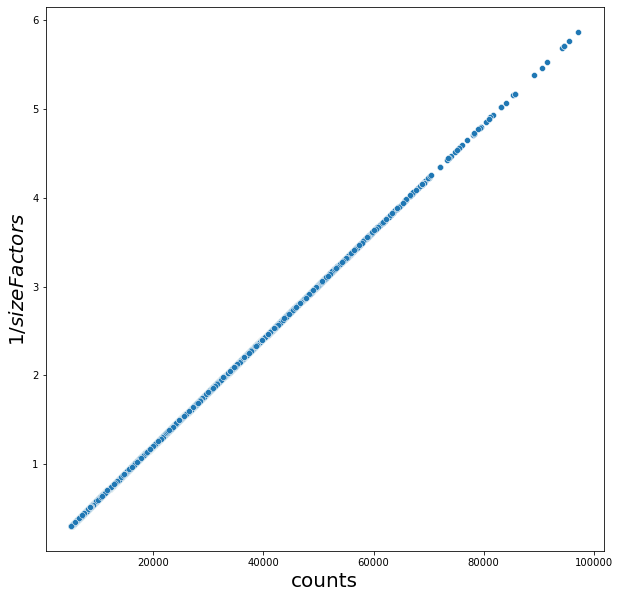

In [4]:
fig,ax = plt.subplots(1,1,figsize=[10,10])

sb.scatterplot(a.obs["nCounts"],1/sizeFactors,ax=ax)
ax.set_xlabel("counts",fontsize=20)
ax.set_ylabel(r"$1/sizeFactors$",fontsize=20)

fig.savefig("Plots/2_Normalisation/SizefactorVsCounts.png",bbox_inches="tight",transparent=True)
fig.show()

In [5]:
a.obs["SizeFactors"] = sizeFactors.values

Trying to set attribute `.obs` of view, copying.


In [6]:
a.write("dataOut/Raw.h5ad")